# Toyota Corolla Price Detection Model

Author:
Aswin Yayathi Andal

In [28]:
#Importing required libraries
#seaborn - used for plots(Heatmaps in correlation)
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import timeit

In [29]:
#LINEAR REGRESSION
corolla = pd.read_csv('ToyotaCorolla.csv')

In [30]:
#Displays number of records present in the dataset & the number of columns(predictors)
print(corolla.shape)

(2872, 24)


In [31]:
#Dropping predictor 'Cylinders' since the entire column had null values.
corolla = corolla.drop(columns = ['Id','Cylinders'])

In [32]:
#Displaying data types of all columns in the dataset
corolla.dtypes

Price              float64
Age_08_22          float64
KM                 float64
Fuel_Type           object
HP                 float64
Color               object
Automatic          float64
CC                 float64
Doors              float64
Gears              float64
Mfr_Guarantee      float64
ABS                float64
Airbag_1           float64
Airbag_2           float64
Airco              float64
CD_Player          float64
Powered_Windows    float64
Power_Steering     float64
Radio              float64
Mistlamps          float64
Sport_Model        float64
Metallic_Rim       float64
dtype: object

In [33]:
#Displays the number of null values in each column
corolla.isnull().sum()

Price              1437
Age_08_22          1436
KM                 1436
Fuel_Type          1436
HP                 1436
Color              1445
Automatic          1436
CC                 1441
Doors              1436
Gears              1436
Mfr_Guarantee      1437
ABS                1436
Airbag_1           1436
Airbag_2           1436
Airco              1437
CD_Player          1436
Powered_Windows    1436
Power_Steering     1436
Radio              1436
Mistlamps          2471
Sport_Model        1436
Metallic_Rim       1436
dtype: int64

In [34]:
#Dropping null records
corolla = corolla.dropna(axis = 0)

In [35]:
#Selecting predictors and response variables and loading into seperate dataframes
predictors_df_corollas = corolla.loc[:,'Age_08_22':'Metallic_Rim']
response_corollas = corolla['Price']

In [36]:
predictors_df_corollas.head(10)

,Age_08_22,KM,Fuel_Type,HP,Color,Automatic,CC,Doors,Gears,Mfr_Guarantee,...,Airbag_1,Airbag_2,Airco,CD_Player,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Metallic_Rim
1,23.0,46986.0,Diesel,90.0,Blue,0.0,2000.0,3.0,5.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,23.0,72937.0,Diesel,90.0,Silver,0.0,2000.0,3.0,5.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,24.0,41711.0,Diesel,90.0,Blue,0.0,2000.0,3.0,5.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,26.0,48000.0,Diesel,90.0,Black,0.0,2000.0,3.0,5.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,30.0,38500.0,Diesel,90.0,Black,0.0,2000.0,3.0,5.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
11,32.0,61000.0,Diesel,90.0,White,0.0,2000.0,3.0,5.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
13,27.0,94612.0,Diesel,90.0,Grey,0.0,2000.0,3.0,5.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
15,30.0,75889.0,Diesel,90.0,Grey,0.0,2000.0,3.0,5.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
17,27.0,19700.0,Petrol,192.0,Red,0.0,1800.0,3.0,5.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
19,23.0,71138.0,Diesel,69.0,Blue,0.0,1900.0,3.0,5.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
#Categoriszation of columns
predictors_df_corollas = pd.get_dummies(predictors_df_corollas)
predictors_df_corollas = predictors_df_corollas.drop(["Fuel_Type_Diesel"], axis = 1)

In [38]:
#Creating Train & Test Splits
X_prediction = predictors_df_corollas
y_prediction = response_corollas
train_X_prediction, test_X_prediction, train_y_prediction, test_y_prediction = train_test_split(X_prediction, 
                                                            y_prediction, test_size=0.3, random_state=616)

In [39]:
#Normalizing Predictors
z_score_norm2 = preprocessing.StandardScaler()
z_score_norm2.fit(train_X_prediction)

train_X_prediction = pd.DataFrame(z_score_norm2.transform(train_X_prediction), 
                                          columns = predictors_df_corollas.columns)
test_X_prediction = pd.DataFrame(z_score_norm2.transform(test_X_prediction), 
                                          columns = predictors_df_corollas.columns)
test_X_prediction

,Age_08_22,KM,HP,Automatic,CC,Doors,Gears,Mfr_Guarantee,ABS,Airbag_1,...,Fuel_Type_CNG,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_White,Color_Yellow
0,0.885815,1.533127,-0.413826,-0.196875,-0.292538,-1.384219,-0.15133,-1.030310,0.175412,0.106399,...,-0.137882,0.473016,-0.406469,-0.600338,-0.348337,1.665727,-0.361665,-0.291582,-0.123091,-0.106399
1,0.557917,-0.540912,0.332046,-0.196875,-0.069443,0.772587,-0.15133,-1.030310,0.175412,0.106399,...,-0.137882,0.473016,-0.406469,-0.600338,-0.348337,1.665727,-0.361665,-0.291582,-0.123091,-0.106399
2,0.803841,0.891023,-2.020319,-0.196875,0.265200,0.772587,-0.15133,-1.030310,0.175412,0.106399,...,-0.137882,-2.114093,2.460210,-0.600338,-0.348337,-0.600338,-0.361665,-0.291582,-0.123091,-0.106399
3,0.885815,0.234689,0.332046,-0.196875,-0.069443,-1.384219,-0.15133,0.970582,0.175412,0.106399,...,-0.137882,0.473016,-0.406469,1.665727,-0.348337,-0.600338,-0.361665,-0.291582,-0.123091,-0.106399
4,1.049765,0.061428,0.332046,-0.196875,-0.069443,0.772587,-0.15133,0.970582,0.175412,0.106399,...,-0.137882,0.473016,-0.406469,-0.600338,-0.348337,-0.600338,2.764988,-0.291582,-0.123091,-0.106399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,-0.917626,-0.621511,0.332046,-0.196875,-0.069443,-1.384219,-0.15133,0.970582,0.175412,0.106399,...,-0.137882,0.473016,-0.406469,-0.600338,-0.348337,1.665727,-0.361665,-0.291582,-0.123091,-0.106399
112,0.721866,-0.036012,0.332046,5.079370,-0.069443,0.772587,-0.15133,-1.030310,0.175412,0.106399,...,-0.137882,0.473016,-0.406469,-0.600338,-0.348337,1.665727,-0.361665,-0.291582,-0.123091,-0.106399
113,0.885815,-0.115384,0.332046,-0.196875,-0.069443,0.772587,-0.15133,0.970582,0.175412,0.106399,...,-0.137882,0.473016,-0.406469,-0.600338,-0.348337,-0.600338,-0.361665,3.429563,-0.123091,-0.106399
114,-0.261829,-0.495534,0.332046,-0.196875,-0.069443,0.772587,-0.15133,0.970582,0.175412,0.106399,...,-0.137882,0.473016,2.460210,-0.600338,-0.348337,-0.600338,-0.361665,-0.291582,-0.123091,-0.106399


In [40]:
# train the k-NN model and look at performance on train data

knn_p = KNeighborsRegressor(n_neighbors=5).fit(train_X_prediction, train_y_prediction)
predicted_y_training3 = knn_p.predict(train_X_prediction)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_prediction, predicted_y_training3) ** 0.5, 4))

Root Mean Squared Error (RMSE):  1868.669


In [41]:
# performance of k-NN on test data

predicted_y_test3 = knn_p.predict(test_X_prediction)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y_prediction, predicted_y_test3) ** 0.5, 4))

Root Mean Squared Error (RMSE):  2154.1942


In [42]:
#Displaying RMSE for each value of k(number of neighbours)
results = []
for k in range(1, 20):
    knn_p2 = KNeighborsRegressor(n_neighbors=k).fit(train_X_prediction, train_y_prediction)
    results.append({
        'k': k,
        'RMSE': round(mean_squared_error(test_y_prediction, knn_p2.predict(test_X_prediction)) ** 0.5, 4)
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k       RMSE
0    1  2688.7820
1    2  2122.2488
2    3  2076.0554
3    4  2101.3059
4    5  2154.1942
5    6  2271.2224
6    7  2339.4597
7    8  2412.8747
8    9  2436.1828
9   10  2474.8702
10  11  2486.2718
11  12  2509.3507
12  13  2514.1696
13  14  2535.4820
14  15  2542.0087
15  16  2554.9934
16  17  2595.8852
17  18  2599.7842
18  19  2627.5883


In [43]:
#Linear Regression on training data
linear_model = LinearRegression()
linear_model = linear_model.fit(train_X_prediction, train_y_prediction)
predicted_y_training4 = linear_model.predict(train_X_prediction)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_prediction, predicted_y_training4) ** 0.5, 4))

Root Mean Squared Error (RMSE):  1317.4118


In [44]:
# performance of linear regression on test data

predicted_y_test4 = linear_model.predict(test_X_prediction)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y_prediction, predicted_y_test4) ** 0.5, 4))

Root Mean Squared Error (RMSE):  1521.5694


In [45]:
#Changing parameters(Limiting predictors)
predictors_df_corolla = corolla[['Age_08_22', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'CC', 
              'Doors', 'Metallic_Rim']]
response_corolla = corolla['Price']

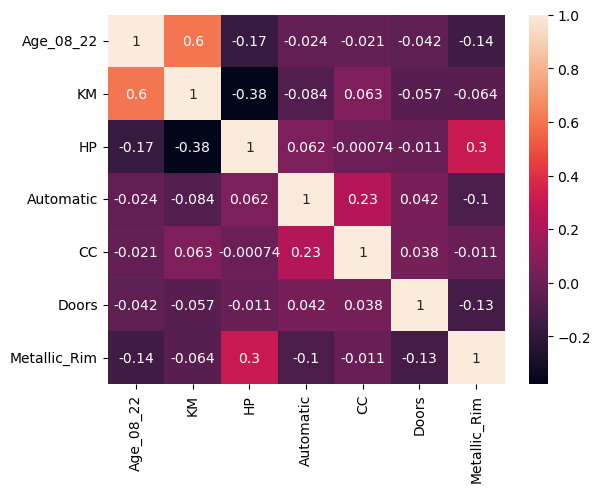

In [46]:
#Showing heatmap of all predictors
correlation_matrix = predictors_df_corolla.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [55]:
predictors_df_corolla = pd.get_dummies(predictors_df_corolla)
predictors_df_corolla.head(10)

,Age_08_22,KM,HP,Automatic,CC,Doors,Metallic_Rim,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
1,23.0,46986.0,90.0,0.0,2000.0,3.0,0.0,0,1,0
3,23.0,72937.0,90.0,0.0,2000.0,3.0,0.0,0,1,0
5,24.0,41711.0,90.0,0.0,2000.0,3.0,0.0,0,1,0
7,26.0,48000.0,90.0,0.0,2000.0,3.0,0.0,0,1,0
9,30.0,38500.0,90.0,0.0,2000.0,3.0,0.0,0,1,0
11,32.0,61000.0,90.0,0.0,2000.0,3.0,0.0,0,1,0
13,27.0,94612.0,90.0,0.0,2000.0,3.0,0.0,0,1,0
15,30.0,75889.0,90.0,0.0,2000.0,3.0,0.0,0,1,0
17,27.0,19700.0,192.0,0.0,1800.0,3.0,1.0,0,0,1
19,23.0,71138.0,69.0,0.0,1900.0,3.0,0.0,0,1,0


In [48]:
#Creating Train & Test Splits
X_prediction = predictors_df_corolla
y_prediction = response_corolla
train_X_prediction5, test_X_prediction5, train_y_prediction5, test_y_prediction5 = train_test_split(X_prediction, 
                                                            y_prediction, test_size=0.3, random_state=616)

In [49]:
#Normalizing Predictors
z_score_norm3 = preprocessing.StandardScaler()
z_score_norm3.fit(train_X_prediction5)

train_X_prediction5 = pd.DataFrame(z_score_norm3.transform(train_X_prediction5), 
                                          columns = predictors_df_corolla.columns)
test_X_prediction5 = pd.DataFrame(z_score_norm3.transform(test_X_prediction5), 
                                          columns = predictors_df_corolla.columns)

In [50]:
linear_model = linear_model.fit(train_X_prediction5, train_y_prediction5)
predicted_y_training5 = linear_model.predict(train_X_prediction5)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_prediction5, predicted_y_training5) ** 0.5, 4))

Root Mean Squared Error (RMSE):  1598.9111


In [51]:
# performance of linear regression on test data

predicted_y_test4 = linear_model.predict(test_X_prediction5)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y_prediction, predicted_y_test4) ** 0.5, 4))

Root Mean Squared Error (RMSE):  1701.238


In [54]:
results = []
for k in range(1, 20):
    knn_p2 = KNeighborsRegressor(n_neighbors=k).fit(train_X_prediction, train_y_prediction)
    results.append({
        'k': k,
        'RMSE': round(mean_squared_error(test_y_prediction, knn_p2.predict(test_X_prediction)) ** 0.5, 4)
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k       RMSE
0    1  2688.7820
1    2  2122.2488
2    3  2076.0554
3    4  2101.3059
4    5  2154.1942
5    6  2271.2224
6    7  2339.4597
7    8  2412.8747
8    9  2436.1828
9   10  2474.8702
10  11  2486.2718
11  12  2509.3507
12  13  2514.1696
13  14  2535.4820
14  15  2542.0087
15  16  2554.9934
16  17  2595.8852
17  18  2599.7842
18  19  2627.5883


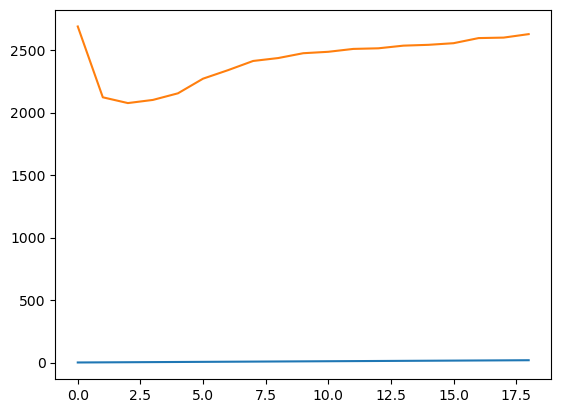

In [53]:
plt.plot(results)
plt.show()

In [26]:
linear_model = LinearRegression()
linear_model = linear_model.fit(train_X_prediction, train_y_prediction)
predicted_y_training4 = linear_model.predict(train_X_prediction)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_prediction, predicted_y_training4) ** 0.5, 4))

Root Mean Squared Error (RMSE):  1317.4118


In [27]:
# performance of linear regression on test data

predicted_y_test4 = linear_model.predict(test_X_prediction)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y_prediction, predicted_y_test4) ** 0.5, 4))

Root Mean Squared Error (RMSE):  1521.5694


In [234]:
#Decision Trees
X1 = predictors_df_corollas
y1 = response_corollas
train_X1, test_X1, train_y1, test_y1 = train_test_split(X1,y1, test_size=0.3,random_state=23)

In [235]:
#Decision Tree
DT = DecisionTreeRegressor(random_state=23).fit(train_X1, train_y1)
predicted_y_training1 = DT.predict(train_X1)
print(f1_score(train_y1, predicted_y_training1, average='macro'))
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y1, predicted_y_training1) ** 0.5, 4))

1.0
Root Mean Squared Error (RMSE):  0.0


In [236]:
# performance on test data 

predicted_y_test1 = DT.predict(test_X1)
print(f1_score(test_y1, predicted_y_test1, average='macro'))
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y1, predicted_y_test1) ** 0.5, 4))

0.06498651312376803
Root Mean Squared Error (RMSE):  1718.6429


In [237]:
feature_imp = pd.Series(DT.feature_importances_, index = predictors_df_corollas.columns)
feature_imp

Age_08_22           0.721804
KM                  0.090940
HP                  0.100782
Automatic           0.000735
CC                  0.020519
Doors               0.003401
Gears               0.004595
Mfr_Guarantee       0.003664
ABS                 0.000001
Airbag_1            0.000000
Airbag_2            0.000029
Airco               0.004201
CD_Player           0.001596
Powered_Windows     0.022484
Power_Steering      0.000524
Radio               0.000548
Mistlamps           0.004113
Sport_Model         0.002699
Metallic_Rim        0.002897
Fuel_Type_CNG       0.000031
Fuel_Type_Petrol    0.002596
Color_Black         0.003372
Color_Blue          0.000827
Color_Green         0.000205
Color_Grey          0.003220
Color_Red           0.003317
Color_Silver        0.000702
Color_White         0.000000
Color_Yellow        0.000200
dtype: float64

In [238]:
feature_imp.idxmax()

'Age_08_22'

In [239]:
#Random Forest (Bagging)
RF = RandomForestRegressor(random_state=23).fit(train_X1, train_y1)
predicted_y_training1 = RF.predict(train_X1)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y1, predicted_y_training1) ** 0.5, 4))

Root Mean Squared Error (RMSE):  518.6584


In [206]:
predicted_y_test1 = RF.predict(test_X1)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y1, predicted_y_test1) ** 0.5, 4))

Root Mean Squared Error (RMSE):  1568.216


In [ ]:
#Multiple Linear Regression is recommended. 